In [403]:
!pip install bertopic[visulaization]

In [404]:
import numpy as np
import pandas as pd
from copy import deepcopy
from bertopic import BERTopic

In [405]:
emails = pd.read_csv('C:\Project DBs\Email\emails.csv')
#email_subset = emails[:10000]
email_subset = emails.sample(frac=0.02, random_state=1)

print(email_subset.shape)
print(email_subset.head())

(10348, 2)
                              file  \
186822  jones-t/all_documents/634.   
308790  mann-k/all_documents/5690.   
82383         dasovich-j/sent/423.   
227299          kaminski-v/var/63.   
301824     mann-k/_sent_mail/3208.   

                                                  message  
186822  Message-ID: <17820178.1075846925335.JavaMail.e...  
308790  Message-ID: <29110382.1075845717882.JavaMail.e...  
82383   Message-ID: <6812040.1075843194135.JavaMail.ev...  
227299  Message-ID: <21547648.1075856642126.JavaMail.e...  
301824  Message-ID: <12684200.1075846107179.JavaMail.e...  


In [406]:
def parse_raw_message(raw_message):
    lines = raw_message.split('\n')
    email = {}
    message = ''
    keys_to_extract = ['from', 'to']
    for line in lines:
        if ':' not in line:
            message += line.strip()
            email['body'] = message
        else:
            pairs = line.split(':')
            key = pairs[0].lower()
            val = pairs[1].strip()
            if key in keys_to_extract:
                email[key] = val
    return email

In [407]:
def parse_into_emails(messages):
    emails = [parse_raw_message(message) for message in messages]
    return {
        'body': map_to_list(emails, 'body'),
        
    }

In [408]:
def map_to_list(emails, key):
    results = []
    for email in emails:
        if key not in email:
            results.append('');
            
        else:
            results.append(email[key])
    return results

In [409]:
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords

def filter_words(texts):
    stop_words = stopwords.words('english')
    stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [410]:
email_df = pd.DataFrame(parse_into_emails(email_subset.message))
print(email_df.head(3))

                                                body
0  It would be nice if you could be at my dinner,...
1  Absolutely.Good point!  Can Peter start to dra...
2  My apologies.  My schedule melted down after w...


In [411]:
gmail_data=pd.read_csv('C:\\Users\\user\\Downloads\\MailBodyOutput2.csv')
gmail_data.dropna(inplace=True)
gmail_data.head()

,ID,body,to,from_
0,A1,"Hi Dmml,\r\nWelcome to Google. Your new accoun...","('dmml2test@gmail.com',)",googlecommunityteam-noreply@google.com
1,A2,"Your impartial, comprehensive news source.\r\n...","('dmml2test@gmail.com',)",DailyDigest@email.join1440.com
4,A5,** Important: Confirm Your Subscription to Nex...,"('dmml2test@gmail.com',)",dave@davenetics.com
5,A6,Your NextDraft subscription has been confirmed...,"('dmml2test@gmail.com',)",dave@davenetics.com
6,A7,Welcome to ELEVATOR.\r\n\r\nYour inbox is like...,"('dmml2test@gmail.com',)",yo@gettheelevator.com


In [412]:
email_df=email_df.append(gmail_data.drop('ID',axis=1))

In [413]:
docs = list(email_df.loc[:, "body"].values)

In [414]:
docs=filter_words(docs)

In [415]:
doc=[]
for x in docs:
    doc.append(' '.join(x))

In [416]:
doc[:5]

['would nice could dinner since probably knowanyone else anytime want go lunch check house status glad go',
 'absolutely good point peter start draft override letter kay mann enrondieball john grigby reminder us need form override letter go withthe form turbine contract kay',
 'apologies schedule melted talked monday swhere folks came concern size supposed beno larger lobbied aceves apparently ok oversized group folks group talked himoriginally pretty sure five violate rules folks wonderedif groups smaller could hook upwith sorry wrinkle think wespoke gets real ugly trying find smaller group let know fortunately another team case due two weeks best jeff',
 'vince uk var breached limit last week uk traders asked us review correlations across uk gas power aswell correlations across efa slots part work last week update correlations based historical prices tanya richard lewisleppard lon ect ect rudy dautel hou ect ect kirstee hewitt lon ect ect naveen andrews corp enron enron david port ma

In [417]:
from sentence_transformers import SentenceTransformer
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

In [418]:
model = BERTopic(language="english",embedding_model=sentence_model,nr_topics=5,calculate_probabilities=True)

In [419]:
topics, probs = model.fit_transform(doc)

In [420]:
model.get_topic_freq()

,Topic,Count
0,-1,9080
1,0,1025
2,1,688
3,2,614
4,3,585
5,4,332


In [421]:
model.get_topic(0)

[('know', 0.03496860216905176),
 ('get', 0.03400193863487484),
 ('going', 0.02916129708995166),
 ('time', 0.028348515727779505),
 ('good', 0.028009692652785488),
 ('thanks', 0.026780893378197244),
 ('let', 0.0250378912863782),
 ('go', 0.02483456680923948),
 ('would', 0.024732212668291186),
 ('message', 0.02448910216591456)]

In [422]:
model.get_topic(2)

[('enron', 0.354597871450601),
 ('com', 0.32363305931879793),
 ('dec', 0.0321875647240953),
 ('active', 0.030226069092281),
 ('prc', 0.024856336901353315),
 ('mark', 0.024495449344454707),
 ('john', 0.023840843850329748),
 ('position', 0.01876907292380819),
 ('ryan', 0.01798624536295407),
 ('david', 0.016861046705092933)]

In [423]:
model.visualize_topics()

In [424]:
#new_topics, new_probs=model.reduce_topics(docs, topics, probs, nr_topics=20)

In [425]:
model.get_topic_info()

,Topic,Count,Name
0,-1,9080,-1_com_enron_https_px
1,0,1025,0_know_get_going_time
2,1,688,1_name_thank_product_link
3,2,614,2_enron_com_dec_active
4,3,585,3_post_link_add_name
5,4,332,4_magnet_lead_name_link


In [426]:
model.find_topics('subscribe')

([3, 1, 4, 0, -1],
 [0.5295609794136726,
  0.4971626910981621,
  0.4475543165572571,
  0.4378439345057722,
  0.42815165539868016])

In [427]:
model.find_topics('unsubsribe')

([3, 4, -1, 1, 0],
 [0.33967734254901927,
  0.33740946558963175,
  0.3227409377048439,
  0.31845581862032296,
  0.3065564519348303])

In [428]:
model.find_topics('deals')

([-1, 0, 1, 4, 3],
 [0.4898537323872253,
  0.48161750350643917,
  0.4747388356673793,
  0.4655097694745606,
  0.4581139543919112])

In [429]:
model.find_topics('offers')

([3, 1, 0, -1, 4],
 [0.4299436721843279,
  0.40716434958263403,
  0.3894315364376717,
  0.38410276029009416,
  0.36774422504996584])

In [430]:
model.visualize_barchart(n_words=10)


In [431]:
model.visualize_heatmap()

In [432]:
topics_to_assign=[]
for item in gmail_data.iterrows():
    assigned_topic,prob=model.transform(item[1]['body'])
    if(assigned_topic==-1):
        assigned_topic=np.argmax(prob)
    topics_to_assign.append(assigned_topic[0])
gmail_data['Topic']=topics_to_assign

C:\Users\user\anaconda3\lib\site-packages\scipy\sparse\_index.py:125: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [433]:
gmail_data.head()

,ID,body,to,from_,Topic
0,A1,"Hi Dmml,\r\nWelcome to Google. Your new accoun...","('dmml2test@gmail.com',)",googlecommunityteam-noreply@google.com,-1
1,A2,"Your impartial, comprehensive news source.\r\n...","('dmml2test@gmail.com',)",DailyDigest@email.join1440.com,-1
4,A5,** Important: Confirm Your Subscription to Nex...,"('dmml2test@gmail.com',)",dave@davenetics.com,-1
5,A6,Your NextDraft subscription has been confirmed...,"('dmml2test@gmail.com',)",dave@davenetics.com,-1
6,A7,Welcome to ELEVATOR.\r\n\r\nYour inbox is like...,"('dmml2test@gmail.com',)",yo@gettheelevator.com,-1


In [434]:
gmail_data.loc[ gmail_data['Topic'] == -1, 'Topic'] = np.unique(gmail_data['Topic']).max()+1

In [435]:
gmail_data.to_csv('Clustered_Mails_BERTopic.csv',encoding='utf-8')

In [436]:
model.save("Bert_model")

ANN

In [437]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
import keras.optimizers

In [438]:
np.unique(gmail_data['Topic'])

array([0, 1, 3, 4, 5], dtype=int64)

In [439]:
gmail_data.head()

,ID,body,to,from_,Topic
0,A1,"Hi Dmml,\r\nWelcome to Google. Your new accoun...","('dmml2test@gmail.com',)",googlecommunityteam-noreply@google.com,5
1,A2,"Your impartial, comprehensive news source.\r\n...","('dmml2test@gmail.com',)",DailyDigest@email.join1440.com,5
4,A5,** Important: Confirm Your Subscription to Nex...,"('dmml2test@gmail.com',)",dave@davenetics.com,5
5,A6,Your NextDraft subscription has been confirmed...,"('dmml2test@gmail.com',)",dave@davenetics.com,5
6,A7,Welcome to ELEVATOR.\r\n\r\nYour inbox is like...,"('dmml2test@gmail.com',)",yo@gettheelevator.com,5


In [440]:
data=pd.read_csv("C:/Users/user/Downloads/MailOutput_combined.csv")

In [441]:
data.head()

,Date,Sender,Subject,EmailSize,Status,isSubscription,isEncrypted,isFlagged,AttachmentCount,AttachmentSize,isPrimaryRecipient,NoOfToValues,isCC,NoOfCCValues,isBCC,Topic,ID
0,2022-03-10 09:50:34-08:00,googlecommunityteam-noreply@google.com,"Dmml, finish setting up your new Google Account",81274,True,False,False,False,0,0,True,1,False,0,False,2,A1
1,2022-03-11 06:46:10+11:00,DailyDigest@email.join1440.com,You're in! Here's how 1440 works...,36157,False,True,False,False,0,0,True,1,False,0,False,2,A2
2,2022-03-10 19:49:16+00:00,dave@davenetics.com,Verify Your Email Address for NextDraft,23484,False,False,False,False,0,0,True,1,False,0,False,2,A5
3,2022-03-10 19:50:00+00:00,dave@davenetics.com,NextDraft: Subscription Confirmed,23434,False,False,False,False,0,0,True,1,False,0,False,2,A6
4,2022-03-11 06:51:13+11:00,yo@gettheelevator.com,Welcome to ELEVATOR,29669,False,True,False,False,0,0,True,1,False,0,False,2,A7


In [442]:
data.dropna(inplace=True)

In [443]:
data=pd.merge(gmail_data[['ID','Topic']],data.drop('Topic',axis=1),on="ID")


In [444]:
data.to_csv('Clustered_Mails_BERTopic_Final.csv',encoding='utf-8')

In [445]:
data.drop(['Date','Sender','Subject','ID','isFlagged','isEncrypted','NoOfToValues'],axis=1,inplace=True)

In [446]:
data.shape

(1976, 10)

In [447]:
data.head()

,Topic,EmailSize,Status,isSubscription,AttachmentCount,AttachmentSize,isPrimaryRecipient,isCC,NoOfCCValues,isBCC
0,5,81274,True,False,0,0,True,False,0,False
1,5,36157,False,True,0,0,True,False,0,False
2,5,23484,False,False,0,0,True,False,0,False
3,5,23434,False,False,0,0,True,False,0,False
4,5,29669,False,True,0,0,True,False,0,False


In [448]:
data['Topic'] = np.where((data.Topic==2)| (data.Topic==4) | (data.Topic==1) | (data.Topic),1,data.Topic)
data['Topic'] = np.where((data.Topic == 3) | (data.Topic == 3),0,data.Topic==5)


In [449]:
np.unique(data['Topic'])

array([0])

In [450]:
#df=pd.read_csv("C:/Users/user/Documents/GitHub/enfuse/Clustered_Mails_BERTopic_Final.csv")

In [451]:
#plt.hist(df['Topic'])

In [452]:
#plt.matshow(df.corr())
#plt.show()

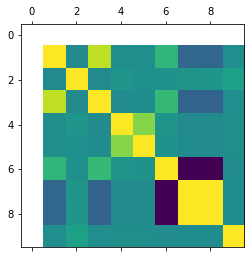

In [453]:
plt.matshow(data.corr())
plt.show()

(array([   0.,    0.,    0.,    0.,    0., 1976.,    0.,    0.,    0.,
           0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

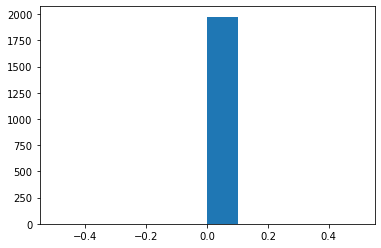

In [468]:
plt.hist(data['Topic'])

In [455]:
y=data['Topic']
X=data.drop('Topic',axis=1)

In [456]:
#encoder = LabelEncoder()
#encoder.fit(y)
#encoded_Y = encoder.transform(y)
# convert integers to dummy variables (one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)

In [457]:
#dummy_y.shape

In [458]:
y_cat = tf.keras.utils.to_categorical(y)

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size = 0.2, random_state = 0)

In [460]:
#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [461]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    staircase=True,
    decay_steps=10000,
    decay_rate=0.9)

In [462]:
ann_classifier = Sequential()

early_stopping_cb = keras.callbacks.EarlyStopping(monitor="loss", patience=25)
# Hidden layers
ann_classifier.add(Dense(units = 128, activation = 'relu',kernel_initializer='random_normal', bias_initializer='zeros'))

ann_classifier.add(Dense(units=128, activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))

ann_classifier.add(tf.keras.layers.Dropout(rate=0.25))

ann_classifier.add(Dense(units = 128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(l=0.01),kernel_initializer='random_normal',
    bias_initializer='zeros'))

# Output layer
ann_classifier.add(Dense(units = len(np.unique(y)), activation = 'softmax'))


# Compiling the ANN
ann_classifier.compile(optimizer = tf.keras.optimizers.Adamax(learning_rate=lr_schedule) , loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="categorical_crossentropy",
), metrics = ['accuracy',tf.keras.metrics.SpecificityAtSensitivity(0.8)])



In [463]:

# Fitting the ANN to the training set
ann_classifier.fit(X_train, y_train, batch_size = 8, epochs = 1000,callbacks=[early_stopping_cb])


Epoch 1/1000
198/198 [==============================] - 2s 4ms/step - loss: 0.0731 - accuracy: 1.0000 - specificity_at_sensitivity_2: 0.0000e+00
Epoch 2/1000
198/198 [==============================] - 1s 3ms/step - loss: 6.7571e-04 - accuracy: 1.0000 - specificity_at_sensitivity_2: 0.0000e+00
Epoch 3/1000
198/198 [==============================] - 1s 4ms/step - loss: 8.6928e-06 - accuracy: 1.0000 - specificity_at_sensitivity_2: 0.0000e+00
Epoch 4/1000
198/198 [==============================] - 1s 4ms/step - loss: 7.1779e-08 - accuracy: 1.0000 - specificity_at_sensitivity_2: 0.0000e+00
Epoch 5/1000
198/198 [==============================] - 1s 5ms/step - loss: 2.5744e-10 - accuracy: 1.0000 - specificity_at_sensitivity_2: 0.0000e+00
Epoch 6/1000
198/198 [==============================] - 1s 4ms/step - loss: 2.7653e-13 - accuracy: 1.0000 - specificity_at_sensitivity_2: 0.0000e+00
Epoch 7/1000
198/198 [==============================] - 1s 4ms/step - loss: 5.5084e-17 - accuracy: 1.0000 - sp

In [464]:
y_pred=np.round(ann_classifier.predict(X_test))

In [465]:
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [466]:
from sklearn import metrics
metrics.multilabel_confusion_matrix(y_test,y_pred )

array([[[  0,   0],
        [  0, 396]]], dtype=int64)

In [467]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00       396

    accuracy                           1.00       396
   macro avg       1.00      1.00      1.00       396
weighted avg       1.00      1.00      1.00       396

